do correlation analysis in kreise and connect ones that have corr>0.99

dataset: **f**irmen**v**eränderung (company changes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
cd ..

/Users/cinny/GitHub/Map-Tool


In [3]:
df = pd.read_csv('data/firmenveraenderungen.csv')

In [4]:
df.shape

(10028, 34)

In [5]:
len(df['ags5'].unique())

402

In [6]:
10028/402

24.945273631840795

In [7]:
list(df[df['ags5']==1001]['variable'])

['kr_firm_br_a_m',
 'kr_firm_br_b_m',
 'kr_firm_br_c_m',
 'kr_firm_br_d_m',
 'kr_firm_br_e_m',
 'kr_firm_br_f_m',
 'kr_firm_br_g_m',
 'kr_firm_br_h_m',
 'kr_firm_br_i_m',
 'kr_firm_br_j_m',
 'kr_firm_br_k_m',
 'kr_firm_br_l_m',
 'kr_firm_br_m_m',
 'kr_firm_br_n_m',
 'kr_firm_br_o_m',
 'kr_firm_br_p_m',
 'kr_firm_br_q_m',
 'kr_firm_br_r_m',
 'kr_firm_br_s_m',
 'kr_firm_br_t_m',
 'kr_firm_br_u_m',
 'kr_firm_br_99_m',
 'kr_firm_neug_m',
 'kr_firm_loesch_m',
 'kr_firm_liq_m']

In [8]:
df.columns

Index(['_id', 'ags2', 'bundesland', 'ags5', 'kreis', 'variable', 'd201901',
       'd201902', 'd201903', 'd201904', 'd201905', 'd201906', 'd201907',
       'd201908', 'd201909', 'd201910', 'd201911', 'd201912', 'd202001',
       'd202002', 'd202003', 'd202004', 'd202005', 'd202006', 'd202007',
       'd202008', 'd202009', 'd202010', 'd202011', 'd202012', 'd202101',
       'd202102', 'd202103', 'd202104'],
      dtype='object')

In [8]:
# a - Monthly Company changes in economic sectors - agriculture, forestry and ﬁshing
# b - Monthly Company changes in the economic sector - mining and quarrying of stones and earth
# c - Monthly Company changes in the economic sector - manufacturing
# d - Monthly Company changes in the economic sector - energy supply
# e - Monthly Company changes in business sector - water supply; Sewage and waste disposal and pollution removal
# f - Monthly Company changes in the economic sector - construction
# g - Monthly Company changes in business sector - trade; Maintenance and repair of motor vehicles
# h - Monthly Company changes in the economic sector - transport and storage
# i - Monthly Company changes in the business sector - hospitality
# j - Monthly Company changes in the business sector - information and communication
# k - Monthly Company changes in the economic sector - provision of ﬁnancial and insurance services
# l - Monthly Company changes in the economic sector - real estate and housing
# m - Monthly Company changes in the economic sector - provision of professional, scientiﬁc and technical services
# n - Monthly Company changes in the economic sector - provision of other economic services
# o - Monthly Company changes in the economic sector - public administration, defense; social insurance
# p - Monthly Company changes in business sector - education and teaching
# q - Monthly Company changes in the economic sector - health and social services
# r - Monthly Corporate changes in business - arts, entertainment and recreation
# s - Monthly Company changes in the economic sector - provision of other services
# t - Monthly Company changes in the economic sector - private households with domestic staff; 
#    Manufacture of goods and provision of services by private households for their own use without a pronounced focus
# u - Monthly Company changes in the economic sector - extraterritorial organizations and corporations
# 99 - Monthly Company changes in the economic sector - no information

# neug - Startups by month
# loesch - Company deletions by month
# liq - Company liquidations by month

In [9]:
# fix ags5 code to be len=5, add 0 at front
def fix_ags5(x):
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)
df['ags5'] = df['ags5'].apply(fix_ags5)

In [10]:
df_kr_firm = df[df['variable']=='kr_firm_neug_m']
#df_kr_firm2 = df[df['variable']=='kr_firm_loesch_m']

In [11]:
df_kr_firm = df_kr_firm.set_index('ags5')[df_kr_firm.columns[6:]]

In [30]:
df_kr_firm_corr = df_kr_firm.transpose().corr()
df_kr_firm_corr

ags5,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16069,16070,16071,16072,16073,16074,16075,16076,16077,07000
ags5,,,,,,,,,,,,,,,,,,,,,
01001,1.000000,0.392424,0.157169,0.413639,0.115426,0.067385,0.167150,0.515951,0.134872,0.260702,...,0.391044,0.282480,0.295193,0.121645,-0.023729,0.112393,0.117341,0.091744,0.074840,NaN
01002,0.392424,1.000000,0.432148,0.481229,0.232522,0.257395,0.246655,0.363805,0.132009,0.157200,...,0.244882,0.175682,0.556834,0.495781,-0.032396,0.208238,0.304538,0.284264,-0.215537,NaN
01003,0.157169,0.432148,1.000000,0.039611,0.096414,-0.010030,0.355759,0.441044,0.210534,0.219988,...,0.096276,0.175732,0.253701,0.097116,0.321837,0.077267,0.333694,0.195281,-0.233115,NaN
01004,0.413639,0.481229,0.039611,1.000000,0.246905,0.322580,0.126803,0.471813,0.410773,0.178058,...,0.363931,0.332611,0.367831,0.428724,-0.282135,-0.005270,0.087874,0.032230,0.134489,NaN
01051,0.115426,0.232522,0.096414,0.246905,1.000000,0.064754,0.352574,0.304937,0.376008,-0.037945,...,0.177731,0.380789,0.211881,0.279538,0.238831,-0.036540,0.203988,0.500558,0.179068,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16074,0.112393,0.208238,0.077267,-0.005270,-0.036540,0.050637,0.077506,0.117620,0.033144,0.350998,...,0.398631,0.197641,-0.021861,0.577893,-0.251563,1.000000,0.243944,0.152721,-0.056059,NaN
16075,0.117341,0.304538,0.333694,0.087874,0.203988,0.318030,0.068794,0.207397,0.134720,0.267175,...,0.273185,0.131216,0.154795,0.111666,-0.105083,0.243944,1.000000,0.304495,-0.097814,NaN
16076,0.091744,0.284264,0.195281,0.032230,0.500558,0.200234,0.215241,0.208337,0.151311,0.205598,...,0.230486,0.580626,-0.024496,0.258717,0.256819,0.152721,0.304495,1.000000,0.093849,NaN


In [62]:
threshold = 0.5
(sum((df_kr_firm_corr>threshold).sum())-401)//2

5815

In [63]:
df_filtered = (df_kr_firm_corr>threshold) & (df_kr_firm_corr!=1)
df_filtered

ags5,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16069,16070,16071,16072,16073,16074,16075,16076,16077,07000
ags5,,,,,,,,,,,,,,,,,,,,,
01001,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
01002,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
01003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
01004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
01051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
16075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16076,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [44]:
kreis = df_kr_firm_corr.index #df['ags5'].unique()

In [64]:
G = nx.Graph()
G.add_nodes_from(kreis)

In [65]:
edge_lists = [
    [row_no, kreis[col_no]] 
     for row_no, row in df_filtered.iterrows() 
     for col_no, col_val in enumerate(row[:row_no]) 
     if col_val==True]
edge_lists

[['01055', '01001'],
 ['01055', '01054'],
 ['01056', '01054'],
 ['01056', '01055'],
 ['01059', '01051'],
 ['01059', '01055'],
 ['01059', '01056'],
 ['01059', '01058'],
 ['01061', '01055'],
 ['01061', '01056'],
 ['01061', '01058'],
 ['01061', '01059'],
 ['01062', '01003'],
 ['01062', '01054'],
 ['01062', '01055'],
 ['01062', '01056'],
 ['01062', '01057'],
 ['01062', '01058'],
 ['02000', '01003'],
 ['02000', '01055'],
 ['02000', '01056'],
 ['02000', '01058'],
 ['02000', '01059'],
 ['02000', '01061'],
 ['02000', '01062'],
 ['03101', '01058'],
 ['03153', '01054'],
 ['03153', '01059'],
 ['03154', '01058'],
 ['03154', '03101'],
 ['03155', '01058'],
 ['03155', '01062'],
 ['03241', '01001'],
 ['03241', '01055'],
 ['03241', '01057'],
 ['03241', '01058'],
 ['03241', '01059'],
 ['03241', '01062'],
 ['03241', '02000'],
 ['03251', '01054'],
 ['03251', '01055'],
 ['03251', '01056'],
 ['03251', '01059'],
 ['03251', '01062'],
 ['03251', '03101'],
 ['03252', '01001'],
 ['03252', '01002'],
 ['03252', '0

In [66]:
G.add_edges_from(edge_lists)

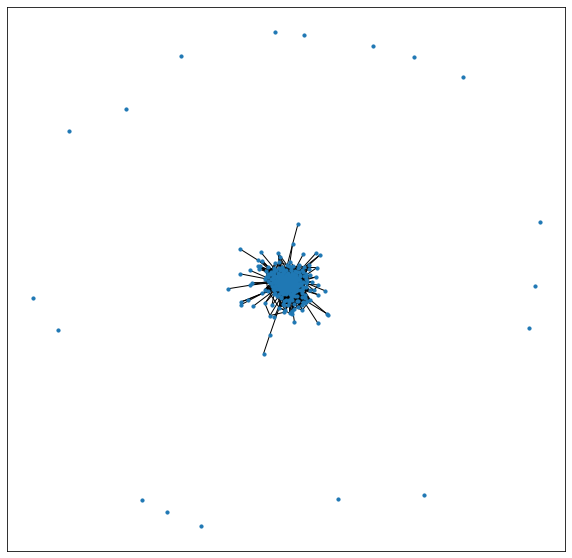

In [67]:
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, node_size=10, with_labels=False)

In [72]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[384, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

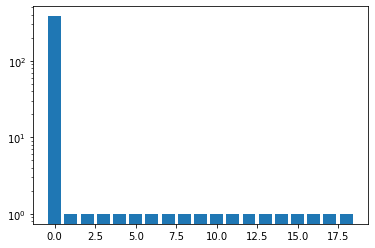

In [73]:
clusters_dist = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
plt.bar(range(0,len(clusters_dist)), clusters_dist)
#plt.yscale('log')

In [69]:
clusters = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [70]:
for c in clusters:
    c = list(c)
    c = [str(i) for i in c]
    counties = df[df['ags5'].isin(c)]
    if len(counties)!=1:
        print(list(counties['kreis']))

['Flensburg, Stadt', 'Kiel, Landeshauptstadt', 'Lübeck, Hansestadt', 'Neumünster, Stadt', 'Dithmarschen', 'Herzogtum Lauenburg', 'Nordfriesland', 'Ostholstein', 'Pinneberg', 'Plön', 'Rendsburg-Eckernförde', 'Schleswig-Flensburg', 'Segeberg', 'Steinburg', 'Stormarn', 'Hamburg', 'Braunschweig', 'Salzgitter', 'Wolfsburg', 'Gifhorn', 'Goslar', 'Helmstedt', 'Northeim', 'Peine', 'Wolfenbüttel', 'Göttingen', 'Hannover', 'Diepholz', 'Hameln-Pyrmont', 'Hildesheim', 'Holzminden', 'Nienburg/Weser', 'Schaumburg', 'Celle', 'Cuxhaven', 'Harburg', 'Lüchow-Dannenberg', 'Lüneburg', 'Osterholz', 'Rotenburg (Wümme)', 'Heidekreis', 'Stade', 'Uelzen', 'Verden', 'Delmenhorst', 'Emden', 'Oldenburg', 'Osnabrück', 'Wilhelmshaven', 'Ammerland', 'Aurich', 'Cloppenburg', 'Emsland', 'Friesland', 'Grafschaft Bentheim', 'Leer', 'Oldenburg', 'Osnabrück', 'Vechta', 'Wesermarsch', 'Wittmund', 'Bremen', 'Bremerhaven', 'Düsseldorf', 'Duisburg', 'Essen', 'Krefeld', 'Mönchengladbach', 'Mülheim an der Ruhr', 'Oberhausen', '